# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [55]:
# Code Here

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import palmerpenguins
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score


In [56]:
df = load_penguins()
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [57]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [58]:
df['year'] = df['year'].astype('object')
X = df[['bill_depth_mm', 'island', 'bill_length_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y = df['species']

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct.fit_transform(X).head()

,dummify__island_Biscoe,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_female,dummify__sex_male,dummify__year_2007,dummify__year_2008,dummify__year_2009,standardize__bill_depth_mm,standardize__bill_length_mm,standardize__flipper_length_mm,standardize__body_mass_g
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.780732,-0.896042,-1.426752,-0.568475
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.119584,-0.822788,-1.069474,-0.506286
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.424729,-0.676280,-0.426373,-1.190361
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.085877,-1.335566,-0.569284,-0.941606
5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.747026,-0.859415,-0.783651,-0.692852


# KNN

## N = 3

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = 100)

knn_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)
y_proba = knn_pipeline.predict_proba(X_test)[:, 1] if len(set(y)) == 2 else None  

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
recall = recall_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
f1 = f1_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

print(f"Metrics for k=3:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
if len(set(y)) > 2:  
    auc = roc_auc_score(y_test, knn_pipeline.predict_proba(X_test), multi_class='ovr')
else:  
    auc = roc_auc_score(y_test, y_proba)

if auc is not None:
    print(f"AUC: {auc:.3f}")


Metrics for k=3:
Confusion Matrix:
[[37  0  0]
 [ 2 15  0]
 [ 0  0 30]]
Accuracy: 0.976
Precision: 0.977
Recall: 0.976
F1 Score: 0.976
AUC: 1.000
Metrics for k=3:
Confusion Matrix:
[[37  0  0]
 [ 2 15  0]
 [ 0  0 30]]
Accuracy: 0.976
Precision: 0.977
Recall: 0.976
F1 Score: 0.976
AUC: 1.000


## N = 5

In [60]:
knn_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)
y_proba = knn_pipeline.predict_proba(X_test)[:, 1] if len(set(y)) == 2 else None  

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
recall = recall_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
f1 = f1_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

print(f"Metrics for k=3:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
if len(set(y)) > 2:  
    auc = roc_auc_score(y_test, knn_pipeline.predict_proba(X_test), multi_class='ovr')
else:  
    auc = roc_auc_score(y_test, y_proba)

if auc is not None:
    print(f"AUC: {auc:.3f}")



Metrics for k=3:
Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
AUC: 1.000
Metrics for k=3:
Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
AUC: 1.000


# Decision Tree

In [61]:
decision_tree_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(min_samples_leaf=20, random_state=42))
])

decision_tree_pipeline.fit(X_train, y_train)

y_pred = decision_tree_pipeline.predict(X_test)
y_proba = decision_tree_pipeline.predict_proba(X_test)[:, 1] if len(set(y)) == 2 else None  # Only calculate AUC for binary classification

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
recall = recall_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
f1 = f1_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

print(f"Metrics for Decision Tree with min_samples_leaf=20:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
if len(set(y)) > 2:  
    auc = roc_auc_score(y_test, decision_tree_pipeline.predict_proba(X_test), multi_class='ovr')
else:  
    auc = roc_auc_score(y_test, y_proba)

if auc is not None:
    print(f"AUC: {auc:.3f}")


Metrics for Decision Tree with min_samples_leaf=20:
Confusion Matrix:
[[32  4  1]
 [ 3 13  1]
 [ 0  1 29]]
Accuracy: 0.881
Precision: 0.883
Recall: 0.881
F1 Score: 0.881
AUC: 0.944
Metrics for Decision Tree with min_samples_leaf=20:
Confusion Matrix:
[[32  4  1]
 [ 3 13  1]
 [ 0  1 29]]
Accuracy: 0.881
Precision: 0.883
Recall: 0.881
F1 Score: 0.881
AUC: 0.944


In [62]:
decision_tree_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(min_samples_leaf=5, random_state=42))
])

decision_tree_pipeline.fit(X_train, y_train)

y_pred = decision_tree_pipeline.predict(X_test)
y_proba = decision_tree_pipeline.predict_proba(X_test)[:, 1] if len(set(y)) == 2 else None  # Only calculate AUC for binary classification

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
recall = recall_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
f1 = f1_score(y_test, y_pred, average='binary' if len(set(y)) == 2 else 'weighted')
auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

print(f"Metrics for Decision Tree with min_samples_leaf=20:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
if len(set(y)) > 2:  
    auc = roc_auc_score(y_test, decision_tree_pipeline.predict_proba(X_test), multi_class='ovr')
else:  
    auc = roc_auc_score(y_test, y_proba)

if auc is not None:
    print(f"AUC: {auc:.3f}")


Metrics for Decision Tree with min_samples_leaf=20:
Confusion Matrix:
[[32  5  0]
 [ 3 14  0]
 [ 0  1 29]]
Accuracy: 0.893
Precision: 0.902
Recall: 0.893
F1 Score: 0.896
AUC: 0.942
Metrics for Decision Tree with min_samples_leaf=20:
Confusion Matrix:
[[32  5  0]
 [ 3 14  0]
 [ 0  1 29]]
Accuracy: 0.893
Precision: 0.902
Recall: 0.893
F1 Score: 0.896
AUC: 0.942


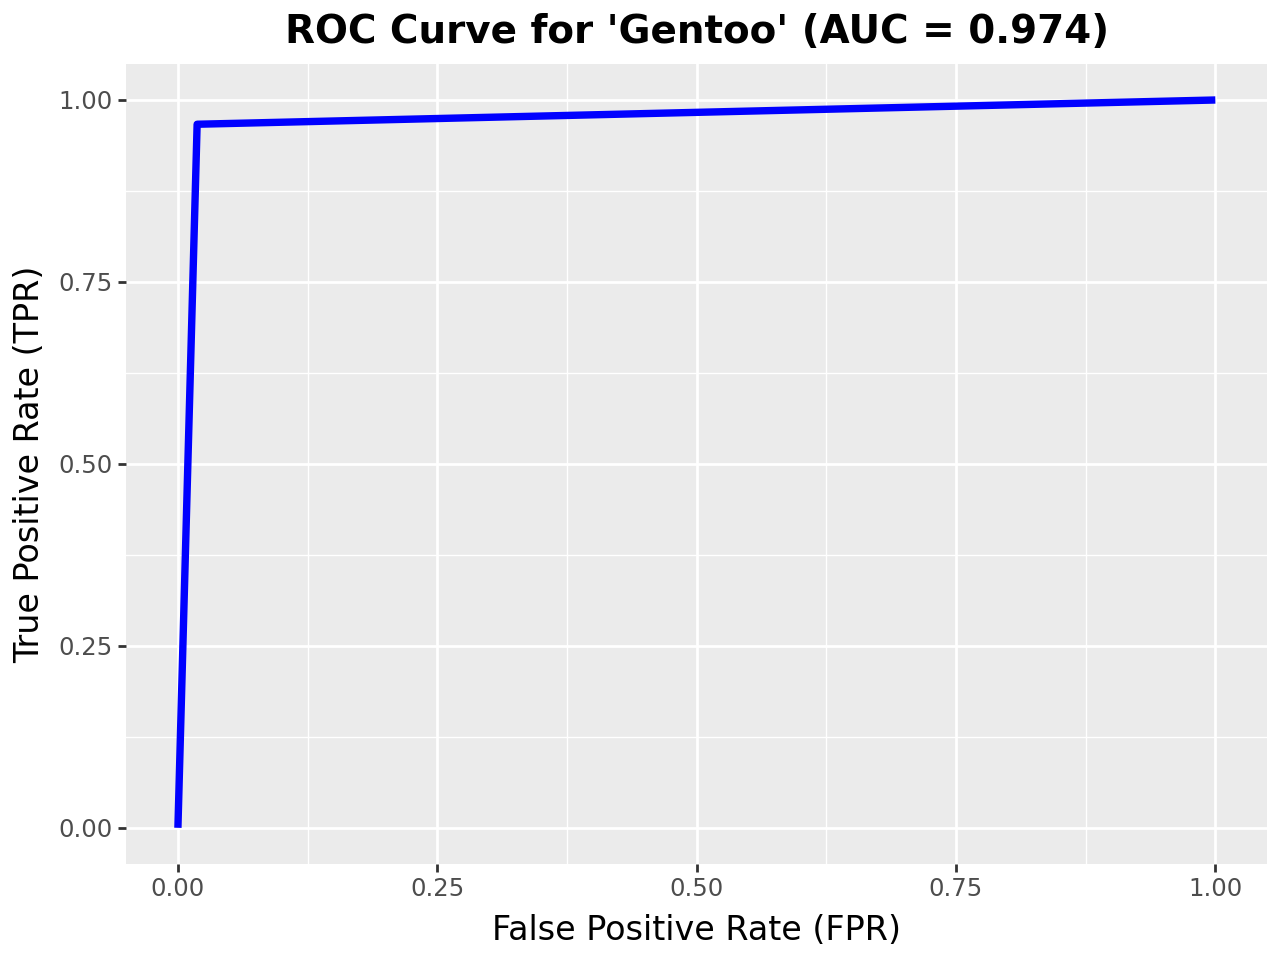

In [63]:
from sklearn.metrics import roc_curve, auc
from plotnine import ggplot, aes, geom_line, labs, theme, element_text

y_train_binary = (y_train == "Gentoo").astype(int)
y_test_binary = (y_test == "Gentoo").astype(int)

decision_tree_pipeline.fit(X_train, y_train_binary)
y_proba_binary = decision_tree_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba_binary)
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr
})

(
    ggplot(roc_df, aes(x="fpr", y="tpr")) +
    geom_line(color="blue", size=1.5) +
    labs(
        title=f"ROC Curve for 'Gentoo' (AUC = {roc_auc:.3f})",
        x="False Positive Rate (FPR)",
        y="True Positive Rate (TPR)"
    ) +
    theme(
        axis_title=element_text(size=12),
        plot_title=element_text(size=14, face="bold")
    )
)


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [64]:
# Code Here